In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
cleaned_data = pd.read_csv("cleaned_employees.csv")


# set seed for reproducibility
np.random.seed(0)

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_employees.csv'

In [2]:
cleaned_data.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6.0,Male,32.0,Married,Mid,7.0,IT,Full-Time,1.0,1.0,...,7.6,Car,20.0,3.0,12.0,0.0,Bachelor,True,33.5,5.0
1,11.0,Female,34.0,Married,Mid,12.0,Finance,Full-Time,2.0,1.0,...,7.9,Car,15.0,4.0,11.0,0.0,Bachelor,False,36.0,5.0
2,33.0,Female,23.0,Single,Intern/Fresher,1.0,Marketing,Full-Time,2.0,4.0,...,6.5,Motorbike,17.0,0.0,30.0,0.0,Bachelor,True,10.5,5.0
3,20.0,Female,29.0,Married,Junior,6.0,IT,Contract,2.0,2.0,...,7.5,Public Transport,13.0,2.0,9.0,0.0,Bachelor,True,23.0,5.0
4,28.0,Other,23.0,Single,Junior,1.0,Sales,Part-Time,3.0,1.0,...,4.9,Car,20.0,0.0,7.0,0.0,Bachelor,False,20.5,5.0


Original data
Preview:
    JobSatisfaction
0              5.0
1              5.0
2              5.0
3              5.0
4              5.0
Minimum value
 1.0 
Maximum value
 5.0
______________________________
Scaled data
Preview:
    JobSatisfaction
0              1.0
1              1.0
2              1.0
3              1.0
4              1.0
Minimum value
 0.0 
Maximum value
 1.0


/run/user/1000/app/com.jetbrains.IntelliJ-IDEA-Ultimate/ipykernel_2209/1061187141.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value\n', float(original_data.min()),
/run/user/1000/app/com.jetbrains.IntelliJ-IDEA-Ultimate/ipykernel_2209/1061187141.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '\nMaximum value\n', float(original_data.max()))
/run/user/1000/app/com.jetbrains.IntelliJ-IDEA-Ultimate/ipykernel_2209/1061187141.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Minimum value\n', float(scaled_data.min()),
/run/user/1000/app/com.jetbrains.IntelliJ-IDEA-Ultimate/ipykernel_2209/1061187141.py:14: FutureWarning: Calling float on a single element Series is

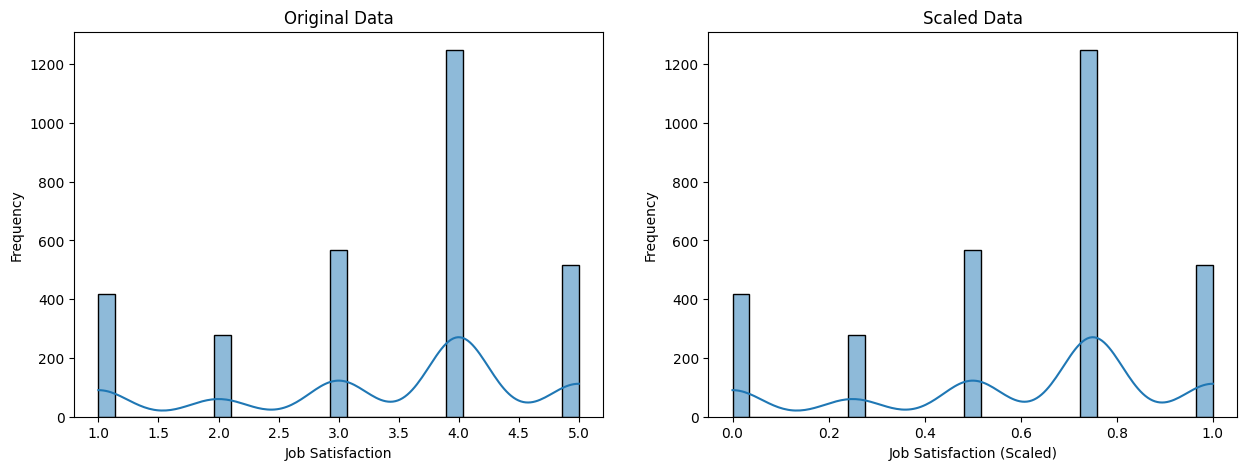

In [14]:
# select the experience column as the data we want to scale
original_data = pd.DataFrame(cleaned_data.JobSatisfaction)

# scale the experience data from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['JobSatisfaction'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value\n', float(original_data.min()),
      '\nMaximum value\n', float(original_data.max()))
print('_'*30)

print('Scaled data\nPreview:\n', scaled_data.head())
print('Minimum value\n', float(scaled_data.min()),
      '\nMaximum value\n', float(scaled_data.max()))

# Plotting the original and scaled data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
ax[0].set_xlabel("Job Satisfaction")
ax[0].set_ylabel("Frequency")

sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
ax[1].set_xlabel("Job Satisfaction (Scaled)")
ax[1].set_ylabel("Frequency")

plt.show()


Original data
Preview:
 0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: JobSatisfaction, dtype: float64
Minimum value
 2.0 
Maximum value
 6.0
______________________________
Normalized data
Preview:
 0    14.587045
1    14.587045
2    14.587045
3    14.587045
4    14.587045
Name: JobSatisfaction, dtype: float64
Minimum value
 1.4159900501727603 
Maximum value
 14.587044586510455


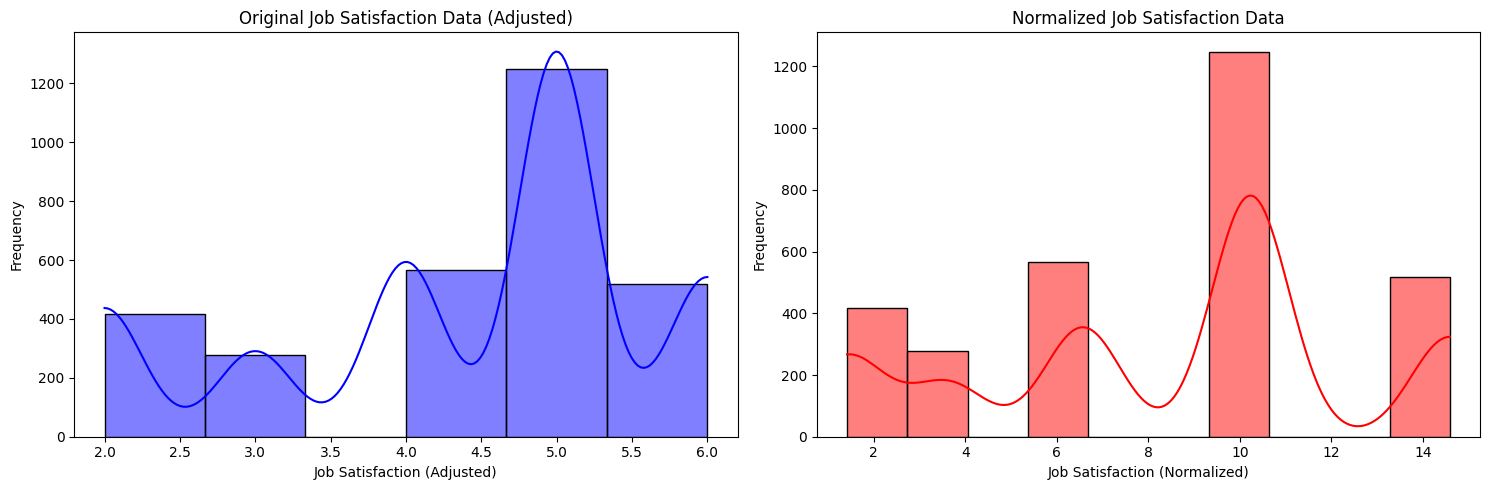

In [17]:
# Filter for positive job satisfaction (shift values to be positive)
# Adding a small constant (e.g., 1) to shift the range from [0, 5] to [1, 6]
adjusted_job_satisfaction = cleaned_data['JobSatisfaction'] + 1

# Normalize the job satisfaction data with Box-Cox
normalized_data = pd.Series(stats.boxcox(adjusted_job_satisfaction)[0], name='JobSatisfaction', index=cleaned_data.index)

# Print original and normalized data statistics
print('Original data\nPreview:\n', adjusted_job_satisfaction.head())
print('Minimum value\n', float(adjusted_job_satisfaction.min()),
      '\nMaximum value\n', float(adjusted_job_satisfaction.max()))
print('_'*30)

print('Normalized data\nPreview:\n', normalized_data.head())
print('Minimum value\n', float(normalized_data.min()),
      '\nMaximum value\n', float(normalized_data.max()))

# Plotting the original and normalized data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Original Data Plot
sns.histplot(adjusted_job_satisfaction, ax=ax[0], kde=True, color='blue', bins=6)
ax[0].set_title("Original Job Satisfaction Data (Adjusted)")
ax[0].set_xlabel("Job Satisfaction (Adjusted)")
ax[0].set_ylabel("Frequency")

# Normalized Data Plot
sns.histplot(normalized_data, ax=ax[1], kde=True, color='red', bins=10)
ax[1].set_title("Normalized Job Satisfaction Data")
ax[1].set_xlabel("Job Satisfaction (Normalized)")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




Explanation:

    Adjusting Values: The original job satisfaction values are shifted by adding 1 to ensure that all values are strictly positive. This allows the Box-Cox transformation to be applied.

    Normalization: The Box-Cox transformation is applied to the adjusted values.

    Statistics Output: The minimum and maximum values are printed for both the adjusted original data and the normalized data.

    Plotting:
        The left histogram shows the adjusted original job satisfaction data (now ranging from 1 to 6).
        The right histogram displays the normalized job satisfaction data.

    Labeling: Ensure that the axes are labeled clearly to reflect the data being analyzed.

This code will help visualize how the job satisfaction data transforms after normalization.
